In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn')

C:\Users\User\AppData\Local\Temp\ipykernel_20560\1127575684.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [99]:
p_df = pd.read_csv('p_df.csv')
b_df = pd.read_csv('b_df.csv')
p_df['Bz'] = -0.7338975205937526
b_df['Dp'] = 1.7335727299047798
df = pd.concat([p_df, b_df], ignore_index=True)
df

,Dp,alpha,r0,Bz
0,0.500000,0.520549,10.930959,-0.733898
1,1.000000,0.510215,10.804006,-0.733898
2,1.500000,0.498601,10.540519,-0.733898
3,2.000000,0.508715,10.080013,-0.733898
4,2.500000,0.527642,9.624467,-0.733898
5,3.000000,0.548459,9.214811,-0.733898
6,3.500000,0.578206,8.854715,-0.733898
7,4.000000,0.581029,8.678715,-0.733898
8,4.500000,0.572972,8.580587,-0.733898
9,5.000000,0.576374,8.393502,-0.733898


In [100]:
def func_a(x, a1, a2, a3):
    return (a1 + a2 * x[0]) * (x[1] ** (1/a3))

def func_r(x, a4, a5, a6, a7, a8, a9, a10, a11):
    return (a4 + a5 * np.tanh(a6 * (x[0] + a7)) + a8 * np.tanh(a9 * (x[0] + a10))) * (x[1] ** (-1/a11))

In [101]:
import numpy as np
import emcee

In [102]:
# Define the alpha
def func_a(x, a1, a2, a3):
    return (a1 + a2 * x[0]) * (x[1] ** (1/a3))

# Define the log-likelihood function
def ln_likelihood(theta, x, y, yerr):
    model = func_a(x, theta[0], theta[1], theta[2])
    chi2 = np.sum((y - model)**2 / yerr**2)
    return -0.5 * chi2


# Define the log-prior function
def ln_prior(theta):
    # Set uniform priors for all parameters
    if -10.0 < theta[0] < 10.0 and -10.0 < theta[1] < 10.0 and 0 < theta[2] < 10.0:
        return 1.0
    else:
        return -np.inf
    
    
# Define the log-posterior function
def ln_posterior(theta, x, y, yerr):
    lp = ln_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + ln_likelihood(theta, x, y, yerr)

In [103]:
# Load df
x = np.array([df['Bz'], df['Dp']])
y = np.array(df['alpha'])
yerr = np.std(y) * np.ones_like(y)

# Set up the MCMC sampler
nwalkers = 40
ndim = 3
pos = np.random.randn(nwalkers, ndim)
sampler = emcee.EnsembleSampler(nwalkers, ndim, ln_posterior, args=(x, y, yerr))

# Burn-in phase
pos, _, _ = sampler.run_mcmc(pos, 10000)

# Production phase
sampler.reset()
sampler.run_mcmc(pos, 10000)

# Get the chain and flatten it
chain = sampler.get_chain(discard=1000, flat=True)

# Get the posterior samples and uncertainties
samples_a = np.percentile(chain, [75, 80, 85], axis=0)
samples_a

c:\Users\User\miniconda3\envs\tensorflow-gpu\lib\site-packages\emcee\moves\red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
C:\Users\User\AppData\Local\Temp\ipykernel_20560\3737371685.py:8: RuntimeWarning: overflow encountered in square
  chi2 = np.sum((y - model)**2 / yerr**2)


array([[4.87215575e-01, 1.22067777e-04, 9.65784521e+00],
       [4.88388037e-01, 2.60491691e-04, 9.73305322e+00],
       [4.89752177e-01, 4.16273454e-04, 9.80312718e+00]])

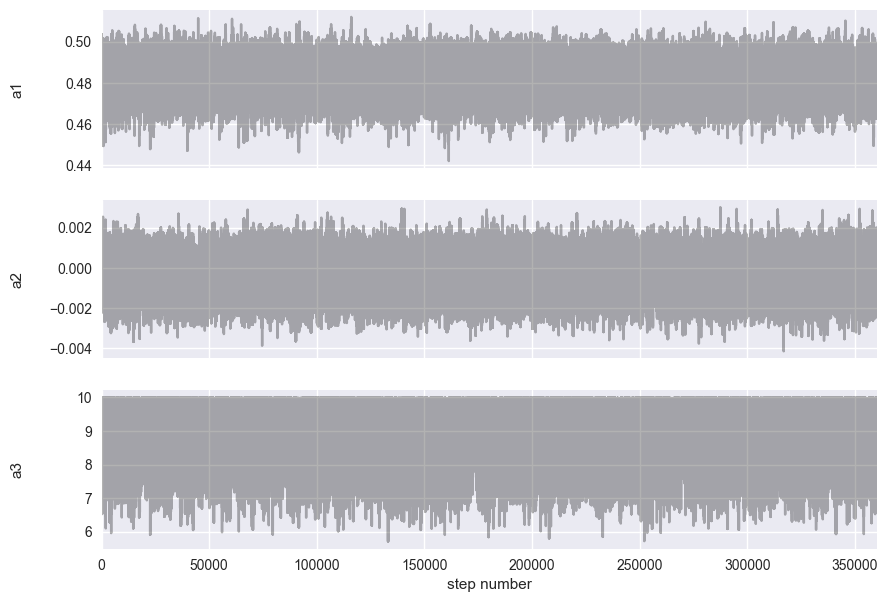

In [104]:
# Plot the posterior samples
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
labels = ["a1", "a2", "a3"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(chain[:, i], "k", alpha=0.3)
    ax.set_xlim(0, len(chain))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)
    
    
axes[-1].set_xlabel("step number");

In [105]:
# Define the alpha
def func_r(x, a0, a1, a2, a3, a4):
    return (a0 + a1 * np.tanh(a2 * (x[0] + a3))) * (x[1] ** (-1/a4))

# Define the log-likelihood function
def ln_likelihood(theta, x, y, yerr):
    model = func_r(x, theta[0], theta[1], theta[2], theta[3], theta[4])
    chi2 = np.sum((y - model)**2 / yerr**2)
    return -0.5 * chi2


# Define the log-prior function
def ln_prior(theta):
    if ( 0 < theta[0] < 15 and 0 < theta[1] < 10 and -10 < theta[2] < 10 \
        and 0 < theta[3] < 15 and 4 < theta[4] < 10):
        return 1.0
    else:
        return -np.inf
    
    
# Define the log-posterior function
def ln_posterior(theta, x, y, yerr):
    lp = ln_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + ln_likelihood(theta, x, y, yerr)

In [106]:
# Load df
x = np.array([df['Bz'], df['Dp']])
y = np.array(df['r0'])
yerr = np.std(y) * np.ones_like(y)

# Set up the MCMC sampler
nwalkers = 75
ndim = 5
pos = np.random.randn(nwalkers, ndim)
sampler = emcee.EnsembleSampler(nwalkers, ndim, ln_posterior, args=(x, y, yerr))

# Burn-in phase
pos, _, _ = sampler.run_mcmc(pos, 1000)

# Production phase
sampler.reset()
sampler.run_mcmc(pos, 10000)

# Get the chain and flatten it
chain = sampler.get_chain(discard=1000, flat=True)

# Get the posterior samples and uncertainties
samples_r = np.percentile(chain, [75, 80, 85], axis=0)
samples_r

array([[10.10688306,  1.00124001,  6.58763094, 11.85424571,  7.93149279],
       [10.16251776,  1.04570747,  7.25607612, 12.21884018,  8.20555759],
       [10.22703409,  1.10565914,  7.93287477, 12.65946613,  8.52344991]])

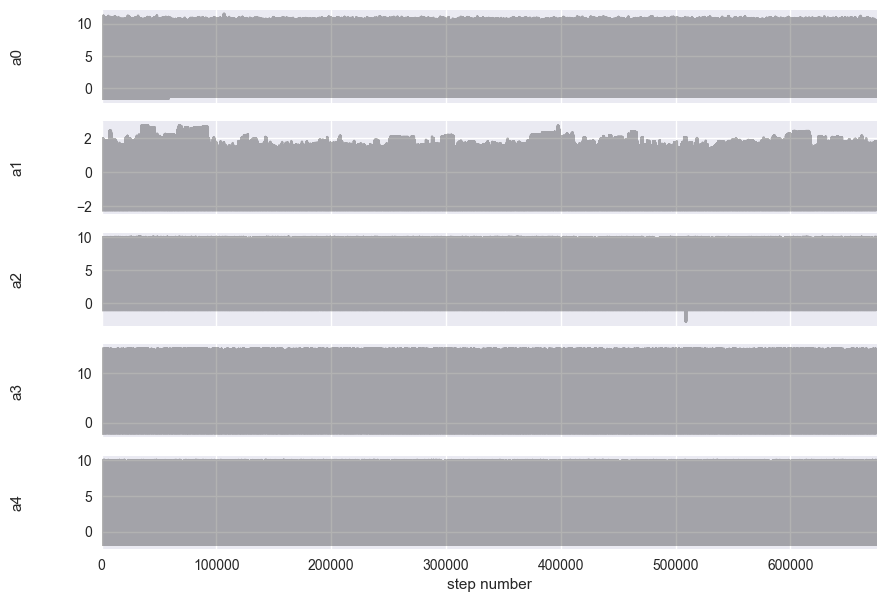

In [107]:
# Plot the posterior samples
fig, axes = plt.subplots(5, figsize=(10, 7), sharex=True)
labels = ["a0", "a1", "a2", "a3", "a4"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(chain[:, i], "k", alpha=0.3)
    ax.set_xlim(0, len(chain))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)
    
    
axes[-1].set_xlabel("step number");

In [108]:
sample_r_0 = samples_r[0]
sample_r_50 = samples_r[1]
sample_r_100 = samples_r[2]


sample_a_0 = samples_a[0]
sample_a_50 = samples_a[1]
sample_a_100 = samples_a[2]

In [109]:
def r0_0(Bz, P):
    return (sample_r_0[0] + sample_r_0[1] * np.tanh(sample_r_0[2] * (Bz + sample_r_0[3]))) * (P ** (-1/sample_r_0[4]))

def alpha_0(Bz, P):
    return (sample_a_0[0] + sample_a_0[1] * Bz) * (P ** (1/sample_a_0[2]))

In [110]:
def r0_50(Bz, P):
    return (sample_r_50[0] + sample_r_50[1] * np.tanh(sample_r_50[2] * (Bz + sample_r_50[3]))) * (P ** (-1/sample_r_50[4]))
# define alpha
def alpha_50(Bz, P):
    return (sample_a_50[0] + sample_a_50[1] * Bz) * (P ** (1/sample_a_50[2]))

In [111]:
# define r0
def r0_100(Bz, P):
    return (sample_r_100[0] + sample_r_100[1] * np.tanh(sample_r_100[2] * (Bz + sample_r_100[3])) ) * (P ** (-1/sample_r_100[4]))

def alpha_100(Bz, P):
    return (sample_a_100[0] + sample_a_100[1] * Bz) * (P ** (1/sample_a_100[2]))

In [112]:
def r_0(Bz, P, theta):
    return r0_0(Bz, P) * ((2/(1+np.cos(theta)))**(alpha_0(Bz, P)))

def r_50(Bz, P, theta):
    return r0_50(Bz, P) * ((2/(1+np.cos(theta)))**(alpha_50(Bz, P)))

def r_100(Bz, P, theta):
    return r0_100(Bz, P) * ((2/(1+np.cos(theta)))**(alpha_100(Bz, P)))

In [113]:
# make a 2D plane of r_pred_hou for different Bz and P
Bz = np.linspace(-20, 20, 100)
P = np.linspace(0.5, 60, 100)

Bz, P = np.meshgrid(Bz, P)

r_pred_mcmc_0 = r_0(Bz, P, 0)
r_pred_mcmc_50 = r_50(Bz, P, 0)
r_pred_mcmc_100 = r_100(Bz, P, 0)

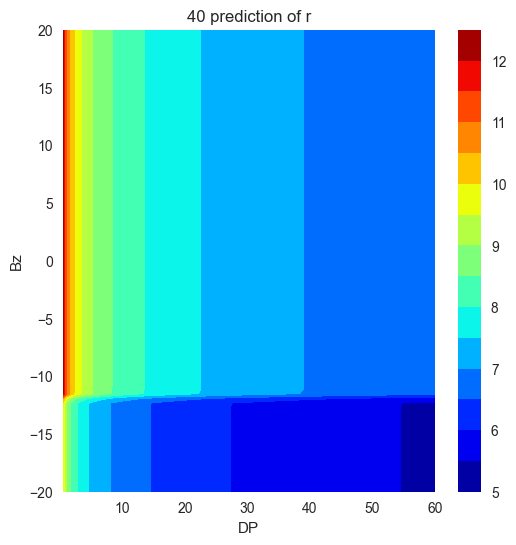

In [114]:
plt.figure(figsize = (6, 6))
plt.contourf(P, Bz, r_pred_mcmc_0, 15, cmap = 'jet')
plt.colorbar()
plt.xlabel('DP')
plt.ylabel('Bz')
plt.title('40 prediction of r')
plt.show()

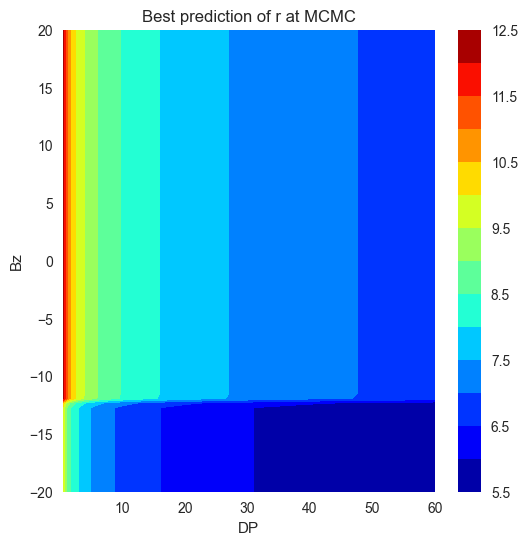

In [121]:
plt.figure(figsize = (6, 6))
plt.contourf(P, Bz, r_pred_mcmc_50, 15, cmap = 'jet')
plt.colorbar()
plt.xlabel('DP')
plt.ylabel('Bz')
plt.title('Best prediction of r at MCMC')
plt.show()

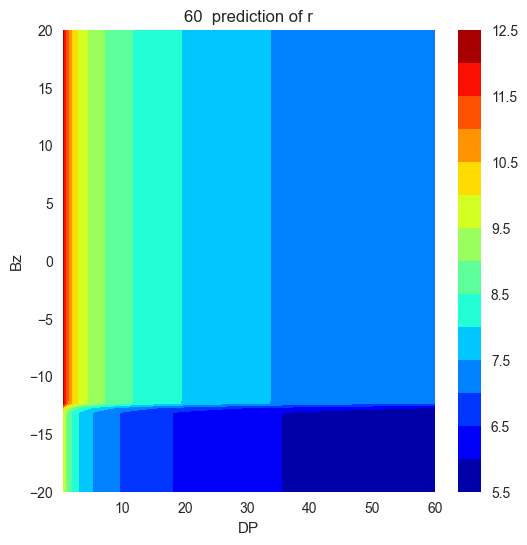

In [116]:
plt.figure(figsize = (6, 6))
plt.contourf(P, Bz, r_pred_mcmc_100, 15, cmap = 'jet')
plt.colorbar()
plt.xlabel('DP')
plt.ylabel('Bz')
plt.title('60  prediction of r')
plt.show()

In [118]:
mp = pd.read_csv('training_data.csv')
mp

,date,Bz,Dp,X_GSM_r,Y_GSM_r,Z_GSM_r,R,r,theta
0,2007-04-21 23:35:24,1.325000,1.541882,2.04513,14.148948,2.828270,14.428854,14.573071,1.427248
1,2007-04-21 21:01:06,0.735000,1.684761,3.07664,13.420758,2.520253,13.655344,13.997647,1.345445
2,2007-04-24 12:48:05,0.555000,1.636927,3.25282,13.359627,3.881805,13.912155,14.287368,1.331962
3,2007-04-24 12:58:20,1.095000,1.821343,3.18863,13.395745,3.958515,13.968386,14.327707,1.337112
4,2007-04-24 15:34:45,0.770000,1.620260,2.11343,13.954823,4.071508,14.536652,14.689481,1.420491
...,...,...,...,...,...,...,...,...,...
34993,2015-12-24 17:36:35,-0.650000,2.419949,7.24000,-8.457936,-3.112683,9.012518,11.560410,-0.862829
34994,2015-12-24 17:40:23,-1.975000,2.376666,7.32000,-8.360967,-3.025661,8.891591,11.517065,-0.851685
34995,2015-12-29 23:53:24,0.440000,1.379989,8.50040,-8.115725,-4.066192,9.077384,12.436065,-0.762252
34996,2015-12-29 23:55:00,0.436667,1.380572,8.54000,-8.110883,-4.098030,9.087369,12.470440,-0.759632


In [119]:
mp['r_MCMC_40'] = r0_0(mp['Bz'], mp['Dp']) * ((2/(1+np.cos(mp['theta'])))**(alpha_0(mp['Bz'], mp['Dp'])))
mp['r_MCMC_50'] = r0_50(mp['Bz'], mp['Dp']) * ((2/(1+np.cos(mp['theta'])))**(alpha_50(mp['Bz'], mp['Dp'])))
mp['r_MCMC_60'] = r0_100(mp['Bz'], mp['Dp']) * ((2/(1+np.cos(mp['theta'])))**(alpha_100(mp['Bz'], mp['Dp'])))

In [120]:
# RMSE for MCMC against r_real
print('RMSE for MCMC against r_real', np.sqrt(np.mean((mp['r_MCMC_40'] - mp['r'])**2)))
print('RMSE for MCMC against r_real', np.sqrt(np.mean((mp['r_MCMC_50'] - mp['r'])**2)))
print('RMSE for MCMC against r_real', np.sqrt(np.mean((mp['r_MCMC_60'] - mp['r'])**2)))

RMSE for MCMC against r_real 1.2202245889867205
RMSE for MCMC against r_real 1.2190676832080816
RMSE for MCMC against r_real 1.2367764886865835
